**************************************
Exp06: Packed Bed Absorber
Roll No: 120CH0057, Name: Siddharth Gautam
Running On: Python  3.11.1  on:  2023-04-25 15:33:00.872800
**************************************

Gas Flow Rate:  138.88888888888889  mol/s
Inert Gas Flow Rate:  134.72222222222223  mol / s m^2
Mole ratio of solute in feed:  0.030927835051546393
Mole fraction of solute in exit gas:  0.001546391752577321
Minimum Liquid Flow Rate:  34.5
Actual Flow Rate:  41.4
Liquid exit mole fraction:  0.10265700483091789
Total ideal stages:  14
x0:  0.0
x1:  0.10265700483091789
y0:  0.03
y1:  0.001546391752577321
y0*:  0.0
y1*:  0.027717391304347833
NTU : 3.709777773770631
F_lv:  0.010734566748828531
Flooding Velocity:  0.40773929768500367  m/s
Actual Flooding Velocity (50% of flooding):  0.20386964884250183
Gas Flow Rate:  3.396074238561285  m^3 / s
Column Area:  16.658066847335867  m^2
Column Diameter:  4.605400031362078  m
H_G:  0.6877229044454901  m
H_L:  0.18468716631777812  m
HTU:  0.85

,Parameter,Value
0,Liquid flow rate (kmol/s),0.041400
1,Gas flow rate (kmol/s),0.138889
2,Stages,14.000000
3,NTU,3.709778
4,HTU (m),0.855012
5,Column Diameter (m),4.605400
6,Tower Height (m),3.806285


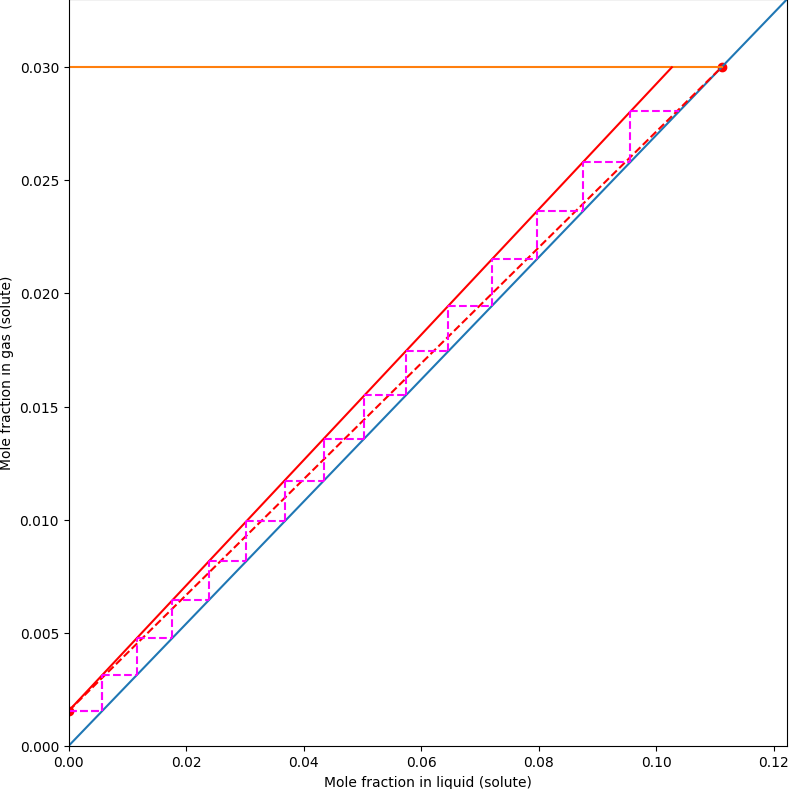

In [7]:
EXPT_NAME="Exp06: Packed Bed Absorber"

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import warnings
from shapely.geometry import LineString


import platform
from datetime import datetime
print("**************************************")
print(EXPT_NAME)
print("Roll No: 120CH0057, Name: Siddharth Gautam")
print("Running On: Python ", platform.python_version(), " on: ", str(datetime.now()))
print("**************************************")
print("")

def equilibrium_data_y(x):
    return 0.27*x

def equilibrium_data_x(y):
    return y / 0.27

def prepare_matplotlib(width=None, height=None):
    import matplotlib as mpl
    mpl.rcParams['savefig.pad_inches'] = 0
    figsize = None if width is None else (width, height)
    fig = plt.figure(figsize=figsize)
    plt.autoscale(tight=True)
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.tight_layout()
    warnings.filterwarnings('ignore')

prepare_matplotlib()

x0 = 0.00
y0 = 0.03
m = 0.27
# mol / s m^2
G = 500 * 1000 / (3600)
transfer_ratio = 0.95
flow_rate_factor = 1.2

# Inert Gas Flow Rate
print("Gas Flow Rate: ", G, " mol/s")
G_s = G * (1 - y0)
print("Inert Gas Flow Rate: ", G_s, " mol / s m^2")
mol_ratio_solute_feed = y0 / (1 - y0)
print("Mole ratio of solute in feed: ", mol_ratio_solute_feed)
y1 = mol_ratio_solute_feed * (1 - transfer_ratio)
print("Mole fraction of solute in exit gas: ", y1)

# Plot the y-line
plt.plot([0, equilibrium_data_x(1.1*y0)], [0, 1.1*y0], label='Equilibrium Line')
plt.plot([0, equilibrium_data_x(y0)], [y0, y0])

equilibrium_line_stack = LineString(np.column_stack(([0, equilibrium_data_x(1.1*y0)], [0, 1.1*y0])))
y1_line_stack = LineString(np.column_stack(([0, equilibrium_data_x(y0)], [y0, y0])))

ol_min_end_point = equilibrium_line_stack.intersection(y1_line_stack)
plt.scatter([x0, ol_min_end_point.x], [y1, ol_min_end_point.y], color='red')
plt.plot([x0, ol_min_end_point.x], [y1, ol_min_end_point.y], '--', color='red')
L_min = ((ol_min_end_point.y - y1) / (ol_min_end_point.x - x0)) * G_s

print("Minimum Liquid Flow Rate: ", L_min)
L_s = flow_rate_factor * L_min
print("Actual Flow Rate: ", L_s)

OL_slope = L_s/G_s
x1 = (y0 + OL_slope*x0 + y1) / OL_slope
print("Liquid exit mole fraction: ", x1)
plt.plot([x0, x1], [y1, y0], color='red')

operating_line_stack = LineString(np.column_stack(([x0, x1], [y1, y0])))

def operating_line(x):
    return y0 + OL_slope * (x - x1)

def mc_cabe_thiele_iteration(x_OL, y_OL):
    horiz_line = LineString(np.column_stack(([x_OL, 1], [y_OL, y_OL])))
    intersection1 = horiz_line.intersection(equilibrium_line_stack)
    vert_line = LineString(np.column_stack(([intersection1.x, intersection1.x], [intersection1.y, 1])))
    intersection2 = vert_line.intersection(operating_line_stack)
    plt.plot([x_OL, intersection1.x], [y_OL, intersection1.y], '--', color='magenta')
    if(len(intersection2.coords) == 0):
        return (x_OL, y_OL*1.1)
    plt.plot([intersection1.x, intersection2.x], [intersection1.y, intersection2.y], '--', color='magenta')
    
    return (intersection2.x, intersection2.y)

xk,yk=(x0, y1)
mc_cabe_thiele_iteration(x0, y1)
stages = 0
while True:
    xk, yk = mc_cabe_thiele_iteration(xk, yk)
    if(yk > y0):
        break
    stages += 1

print("Total ideal stages: ", stages)
plt.xlabel('Mole fraction in liquid (solute)')
plt.ylabel('Mole fraction in gas (solute)')

y0_star = equilibrium_data_y(x0)
y1_star = equilibrium_data_y(x1)
print("x0: ", x0)
print("x1: ", x1)
print("y0: ", y0)
print("y1: ", y1)
print("y0*: ", y0_star)
print("y1*: ", y1_star)
NTU = ((y0 - y1) / ((y0 - y0_star) - (y1 - y1_star))) / math.log(abs((y0 - y0_star) / (y1 - y1_star)))
print("NTU :", NTU)

rho_air = 1.293
rho_water = 997

F_lv = (L_s/G) * math.sqrt(rho_air / rho_water)
print("F_lv: ", F_lv)

ring_diameter = 0.0254
ring_area = 190
voidage = 0.73
mu_water = 0.001

flooding_velocity = math.sqrt(F_lv * 9.81 * (voidage**3) * rho_water / (ring_area * rho_air))
print("Flooding Velocity: ", flooding_velocity, " m/s")
actual_flooding_velocity = 0.5 * flooding_velocity
print("Actual Flooding Velocity (50% of flooding): ", actual_flooding_velocity)
GFR = G * 8.314 * 298 / (101325)
print("Gas Flow Rate: ", GFR, " m^3 / s")
column_area = GFR / actual_flooding_velocity
print("Column Area: ", column_area, " m^2")
column_diameter = math.sqrt(4 * column_area / math.pi)
print("Column Diameter: ", column_diameter, " m")
H_G = 0.3048 * 1.24 * (G**0.31)/(L_s**0.25)
print("H_G: ", H_G, " m")
H_L = 0.3048 * 0.31 * (L_s ** 0.18)
print("H_L: ", H_L, " m")
HTU = H_G + m*(G/L_s)*H_L
print("HTU: ", HTU, " m")
tower_height = HTU * NTU * 1.2
print("Tower height: ", tower_height)

result = { "Liquid flow rate (kmol/s)": L_s/1000, "Gas flow rate (kmol/s)": G/1000, "Stages": stages, "NTU": NTU, "HTU (m)": HTU, "Column Diameter (m)": column_diameter, "Tower Height (m)": tower_height }
df = pd.DataFrame(result.items(), columns=['Parameter', 'Value'])
display(df)
plt.show()